# Домашняя работа "Feature Selection"

Взять датасет https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype.
1. Провести EDA
2. Построить зависимость между качеством модели и количеством отобранных признаков. Т.е. надо обучать модель на количестве признаков от одного до максимально возможного.

Для отбора признаков использовать следующие подходы:

- корреляция признаков (на основе матрицы корреляции) и отбор по величине корреляции
- отбор признаков на основе Information Value (см. статью https://medium.com/mlearning-ai/weight-of-evidence-woe-and-information-value-iv-how-to-use-it-in-eda-and-model-building-3b3b98efe0e8)
- отбор признаков на основе feature_impotance от алгоритма RandomForest
- жадный отбор признаков по максимальному нарастанию качества модели
- жадное отбрасывание признаков по минимальному падению качества модели

# Решение

In [1]:
import pandas
import numpy 
import seaborn
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import fetch_covtype

def get_forest_dataload():
    covtype = fetch_covtype()
    columns = covtype['feature_names']
    data = pandas.DataFrame(
        covtype['data'], 
        columns=columns)
    
    return data

target = 'Elevation'
data = get_forest_dataload()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [4]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Support functions

In [5]:
from sklearn.model_selection import train_test_split
import numpy
from matplotlib import pyplot

def split_data(data, column_names, target_column_name='Elevation'):
    column_names = list(column_names.copy())
    
    try:
        column_names.remove(target_column_name)
    except:
        pass
    
    x_values = data[column_names]
    y_values = data[[target_column_name]]
    
    return train_test_split(
        x_values, 
        y_values, 
        train_size=0.75, 
        random_state=42)

def print_line_regression_score(data, column_names, target_column_name='Elevation'):
    score = get_line_regression_score(
        data=data, 
        column_names=column_names, 
        target_column_name=target_column_name)

    print('score:', score)

def get_line_regression_score(data, column_names, target_column_name='Elevation'):
    x_train, x_test, y_train, y_test = split_data(
        data=data, 
        column_names=column_names, 
        target_column_name=target_column_name )
    
    linearRegression = LinearRegression()
    linearRegression.fit(x_train, y_train)

    return linearRegression.score(x_test, y_test)
    
def show_correlation(data, corr_type='spearman', figsize=(10, 5)):
    corr = numpy.corrcoef(numpy.random.randn(len(data.columns), 200))

    mask = numpy.zeros_like(corr)
    mask[numpy.triu_indices_from(mask)] = True

    _, ax = pyplot.subplots(figsize=figsize) 
    seaborn.heatmap(
        data.corr(corr_type), 
        annot=True,
        mask=mask)
    
    pyplot.show()

### EDA

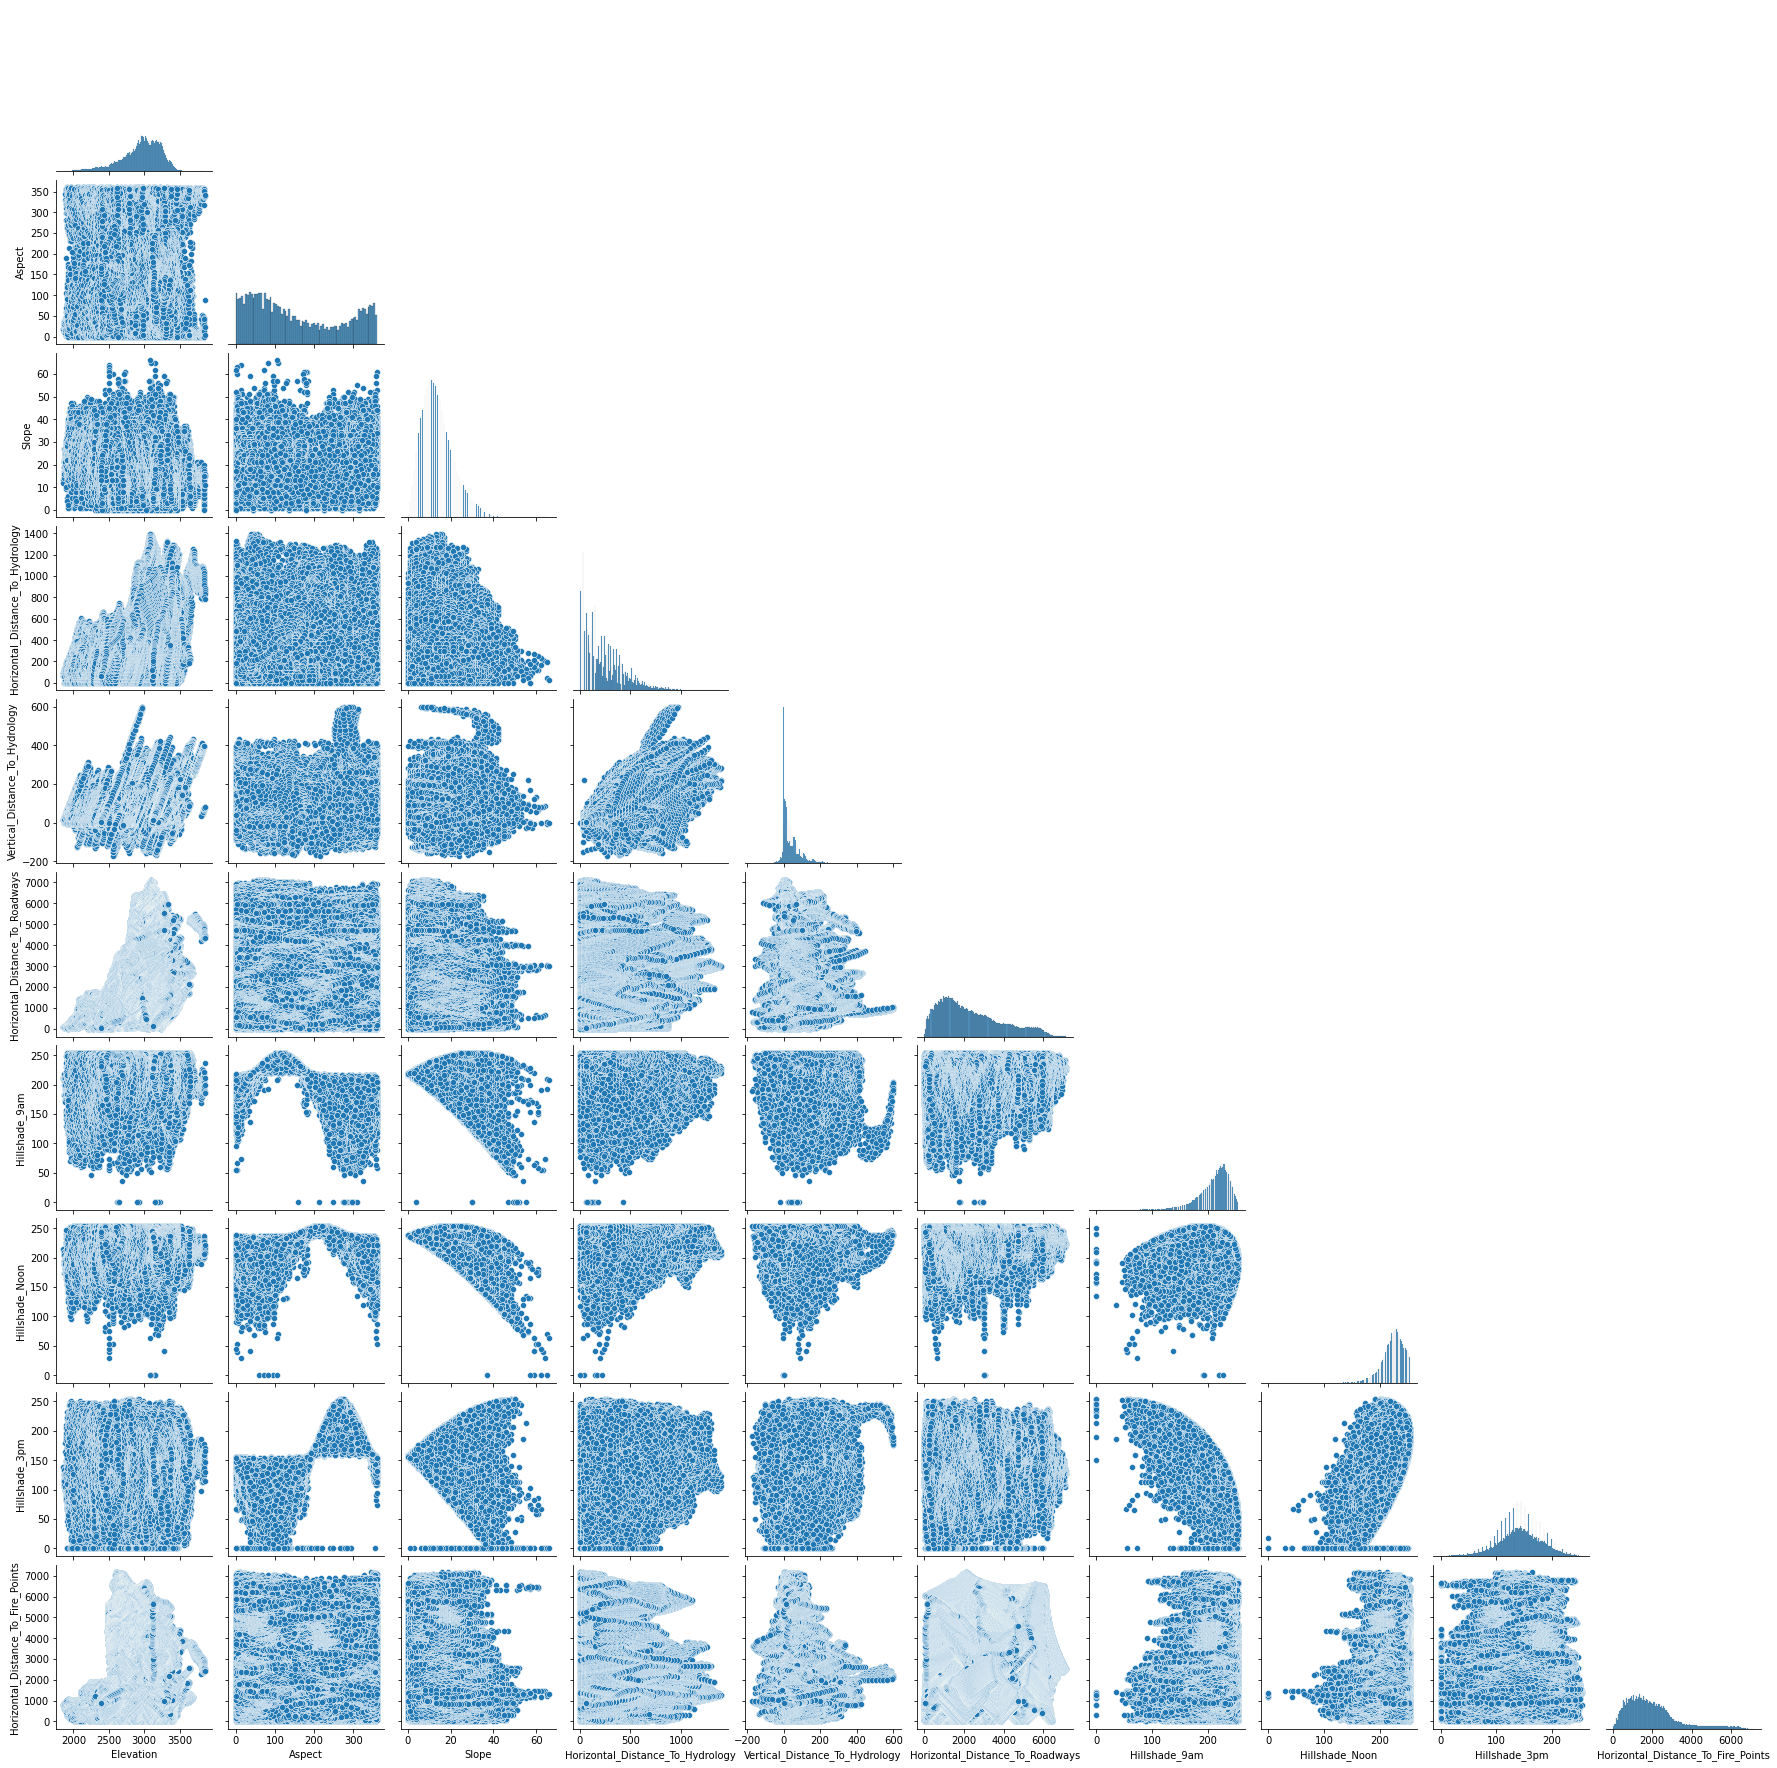

In [6]:
seaborn.pairplot(
    data[[
        'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points'
    ]], 
    corner=True)

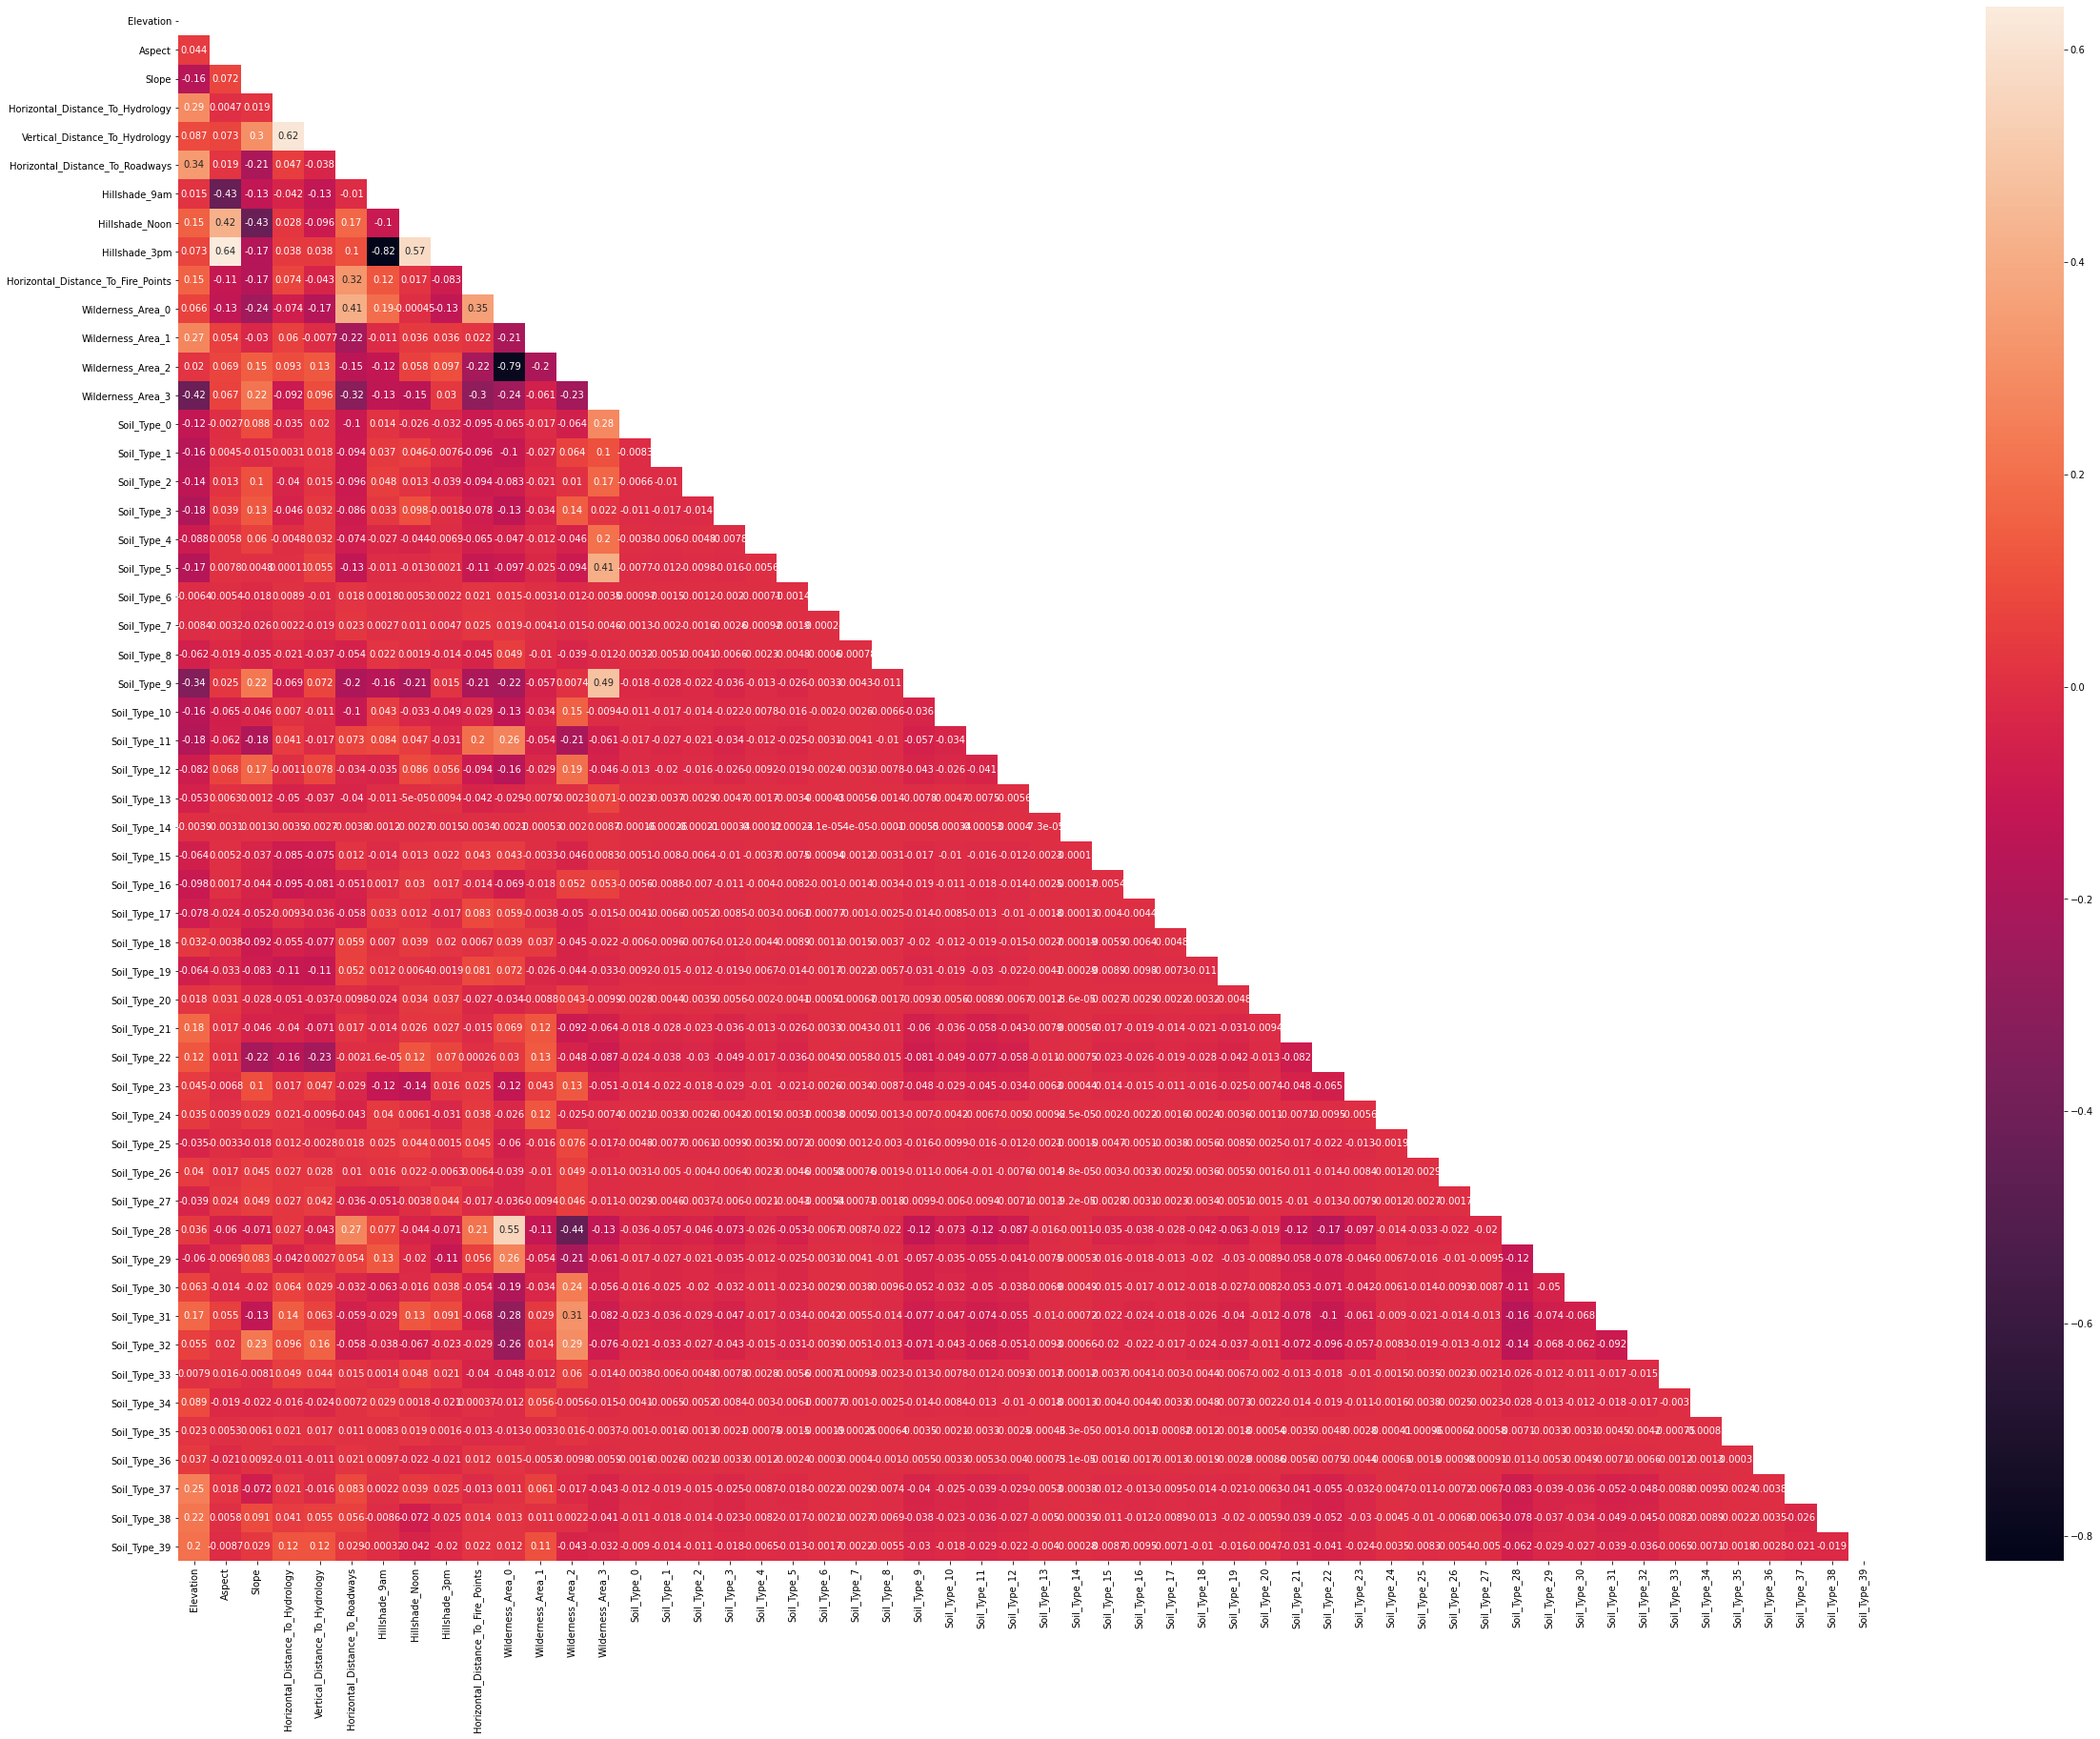

In [7]:
show_correlation(
    data=data,
    figsize=(40,30))

Посмотрим качество модели со всеми столбцами

In [8]:
print_line_regression_score(
    data=data, 
    column_names=data.columns,
    target_column_name=target)

score: 0.781017730378207


## Отбор признаков

#### Корреляция признаков (на основе матрицы корреляции) и отбор по величине корреляции

По матрице корреляции можно увидеть что все колонки с назанием Soil_Type имеют слабую корреляцию ~ (-0.2 - 0.01)

Убираем их.

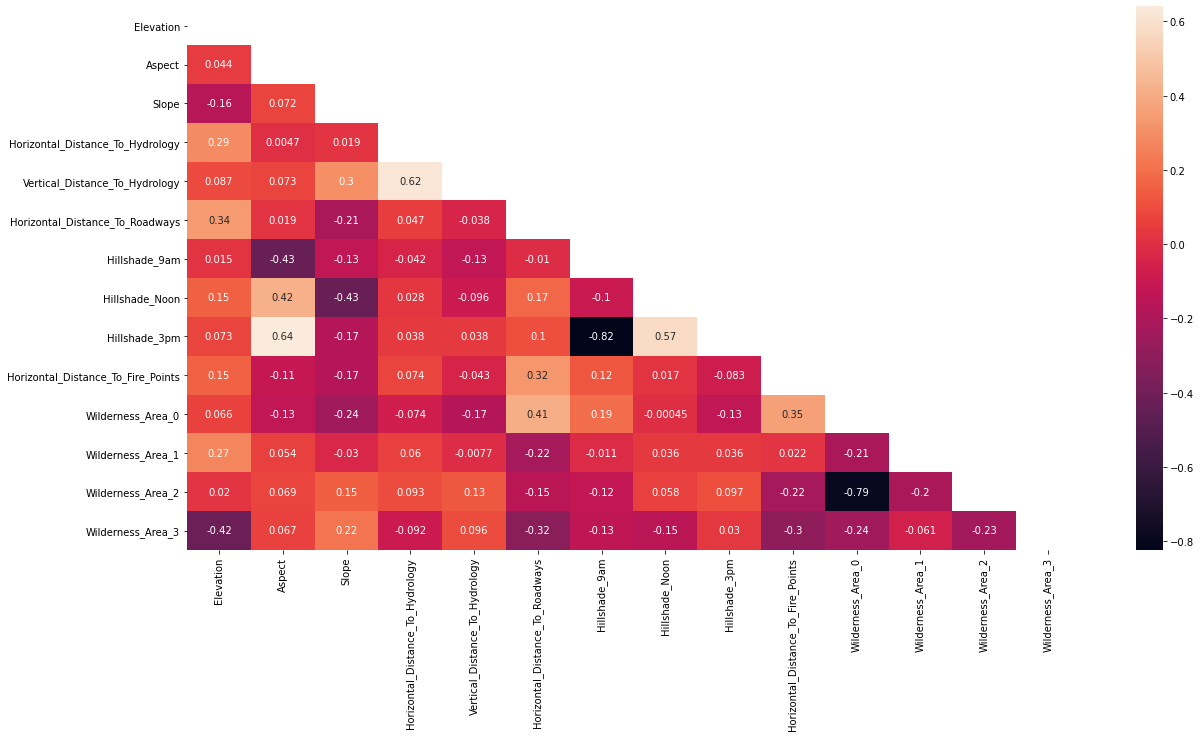

In [9]:
show_correlation(
    data=data[[
        'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
        'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0',
        'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3'
    ]],
    figsize=(20,10))

Оставим признаки у которых корреляция боль 0.3 и ниже -0.3, и помотрим как улучшилась модель

In [10]:
print_line_regression_score(
    data=data, 
    column_names=[
        'Aspect', 'Hillshade_3pm', 'Horizontal_Distance_To_Roadways', 
        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
        'Horizontal_Distance_To_Fire_Points', 'Slope',
        'Hillshade_9am', 'Hillshade_3pm', 'Hillshade_Noon', 'Wilderness_Area_0', 
        'Wilderness_Area_2', 'Wilderness_Area_3'
    ],
    target_column_name=target)

score: 0.5499624652873192


#### Отбор признаков на основе Information Value 

Для работы с WOE и VI целевая переменная должна быть бинарная, сейсас этот метод не подходит для выбранного таргета 'Elevation'

#### Отбор признаков на основе feature_impotance от алгоритма RandomForest

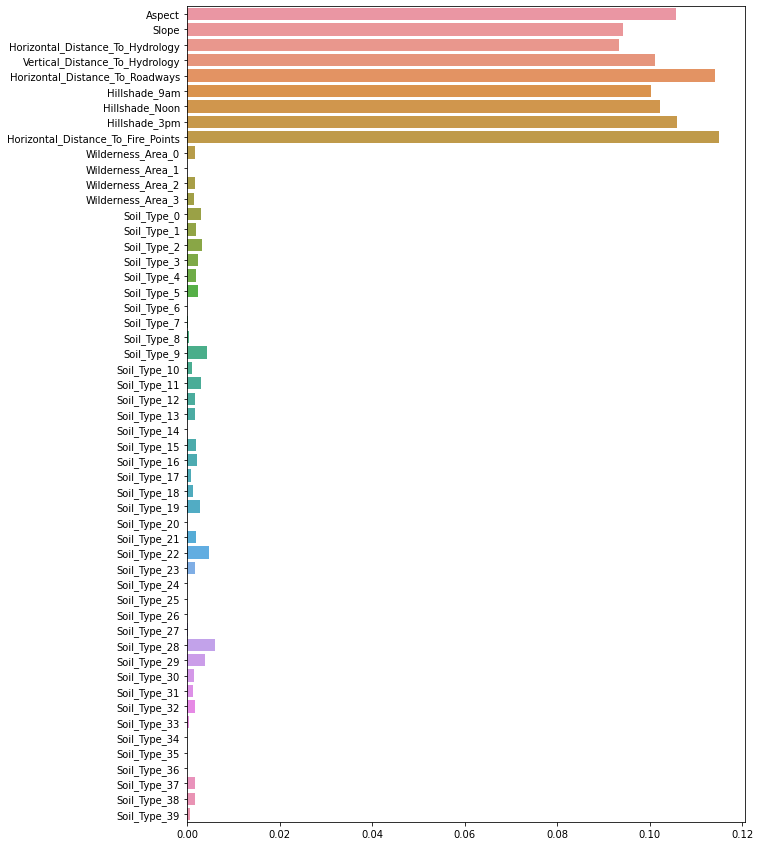

In [11]:
import seaborn
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier

def show_random_forest_classifier(data, column_names, column_target, n_estimators=100, figsize=(10, 15)):
    random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators)

    columns = list(column_names.copy())
    
    try:
        columns.remove(target)
    except:
        pass
    
    random_forest_classifier.fit(
        data[columns], 
        data[target])
    
    feature_importances = pandas.Series(
        random_forest_classifier.feature_importances_,
        index=columns)
    
    _, ax = pyplot.subplots(figsize=figsize) 
    
    seaborn.barplot(
        x=feature_importances, 
        y=feature_importances.index)
    pyplot.show()

show_random_forest_classifier(
    data=data[:5000],
    column_names=data.columns,
    column_target=target)

In [12]:
print_line_regression_score(
    data=data, 
    column_names=[
        'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
        'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
        'Hillshade_9am', 'Hillshade_3pm', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
        'Soil_Type_0', 'Soil_Type_2', 'Soil_Type_9', 'Soil_Type_11', 'Soil_Type_19', 'Soil_Type_22', 
        'Soil_Type_28',  'Soil_Type_29'
    ],
    target_column_name=target)

score: 0.4543483399366175


#### Жадный отбор признаков по максимальному нарастанию качества модели

In [13]:
from FeatureSelection import EnumerationFeaturesClassifier

enumerationFeaturesClassifier = EnumerationFeaturesClassifier()
growth_score, growth_columns = enumerationFeaturesClassifier.get_growth_columns(
    data=data, 
    column_names=data.columns, 
    target_column_name=target,
    isPrintProcess=True)

• score: 0.38110389, columns: ['Wilderness_Area_3']

• score: 0.44284819, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology']

• score: 0.47988520, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

• score: 0.53699735, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1']

• score: 0.56073274, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1', 'Soil_Type_11']

• score: 0.58240353, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1', 'Soil_Type_11', 'Soil_Type_38']

• score: 0.60482754, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1', 'Soil_Type_11', 'Soil_Type_38', 'Soil_Type_37']

• score: 0.62572155, columns: ['Wilderness_Area_3', 'Horiz

In [14]:
print('score: {}\ncolumns: {}'.format(growth_score, growth_columns))

score: 0.7810218531923467
columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1', 'Soil_Type_11', 'Soil_Type_38', 'Soil_Type_37', 'Soil_Type_39', 'Soil_Type_31', 'Soil_Type_3', 'Soil_Type_9', 'Soil_Type_1', 'Soil_Type_10', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_2', 'Soil_Type_17', 'Soil_Type_34', 'Soil_Type_30', 'Soil_Type_32', 'Soil_Type_0', 'Soil_Type_4', 'Soil_Type_16', 'Soil_Type_23', 'Soil_Type_28', 'Hillshade_Noon', 'Hillshade_3pm', 'Soil_Type_8', 'Soil_Type_5', 'Soil_Type_13', 'Soil_Type_36', 'Soil_Type_18', 'Soil_Type_26', 'Soil_Type_20', 'Soil_Type_15', 'Vertical_Distance_To_Hydrology', 'Soil_Type_24', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type_29', 'Wilderness_Area_0', 'Soil_Type_35', 'Soil_Type_27', 'Soil_Type_33', 'Soil_Type_25', 'Aspect', 'Soil_Type_14', 'Hillshade_9am', 'Slope', 'Soil_Type_6', 'Soil_Type_7']


#### Жадное отбрасывание признаков по минимальному падению качества модели

In [15]:
from FeatureSelection import EnumerationFeaturesClassifier

enumerationFeaturesClassifier = EnumerationFeaturesClassifier()
waning_score, waning_columns = enumerationFeaturesClassifier.get_waning_columns(
    data=data, 
    column_names=data.columns, 
    target_column_name=target,
    isPrintProcess=True)

• score: 0.78101773, columns: ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']



In [16]:
print('score: {}\ncolumns: {}'.format(waning_score, waning_columns))

score: 0.7810177303782128
columns: ['Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']


#### Жадный алгоритм  ADD-DEL (совмещаем два предыдущих)

- Добавляем по одному признаку, пока ошибка уменьшается
- Удаляем по одному признаку, пока ошибка уменьшается
- Продолжаем стадии добавления и удаления пока ошибка уменьшается

In [17]:
from FeatureSelection import EnumerationFeaturesClassifier

enumerationFeaturesClassifier = EnumerationFeaturesClassifier()
add_del_score, add_del_columns = enumerationFeaturesClassifier.get_add_del_columns(
    data=data, 
    column_names=data.columns, 
    target_column_name=target,
    isPrintProcess=True)

--- ↑ ---
• score: 0.38110389, columns: ['Wilderness_Area_3']

• score: 0.44284819, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology']

• score: 0.47988520, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

• score: 0.53699735, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1']

• score: 0.56073274, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1', 'Soil_Type_11']

• score: 0.58240353, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1', 'Soil_Type_11', 'Soil_Type_38']

• score: 0.60482754, columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1', 'Soil_Type_11', 'Soil_Type_38', 'Soil_Type_37']

• score: 0.62572155, columns: ['Wilderness_Area_

In [18]:
print('score: {}\ncolumns: {}'.format(add_del_score, add_del_columns))

score: 0.7810218531923467
columns: ['Wilderness_Area_3', 'Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Wilderness_Area_1', 'Soil_Type_11', 'Soil_Type_38', 'Soil_Type_37', 'Soil_Type_39', 'Soil_Type_31', 'Soil_Type_3', 'Soil_Type_9', 'Soil_Type_1', 'Soil_Type_10', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_2', 'Soil_Type_17', 'Soil_Type_34', 'Soil_Type_30', 'Soil_Type_32', 'Soil_Type_0', 'Soil_Type_4', 'Soil_Type_16', 'Soil_Type_23', 'Soil_Type_28', 'Hillshade_Noon', 'Hillshade_3pm', 'Soil_Type_8', 'Soil_Type_5', 'Soil_Type_13', 'Soil_Type_36', 'Soil_Type_18', 'Soil_Type_26', 'Soil_Type_20', 'Soil_Type_15', 'Vertical_Distance_To_Hydrology', 'Soil_Type_24', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type_29', 'Wilderness_Area_0', 'Soil_Type_35', 'Soil_Type_27', 'Soil_Type_33', 'Soil_Type_25', 'Aspect', 'Soil_Type_14', 'Hillshade_9am', 'Slope', 'Soil_Type_6', 'Soil_Type_7']
